This notebook computes typical retuns oven n days for NIFTY

N = number of days 

In [1]:
N = 4 

In [2]:
import numpy as np
import pandas as pd

import datetime

import niftyutils
from niftyutils import load_nifty_data

import matplotlib.pyplot as plt
import mplfinance as fplt

In [3]:
start_date = datetime.datetime(2005,8,1)
end_date = datetime.datetime(2020,8,29)
nifty_data = load_nifty_data(start_date,end_date)

In [4]:
n_days_returns = (nifty_data['Close']/nifty_data['Close'].shift(4) - 1)*100
n_days_returns = n_days_returns.dropna()
n_days_returns[-5:]

Date
2020-08-24    0.712319
2020-08-25    0.559675
2020-08-26    2.098619
2020-08-27    1.650164
2020-08-28    1.579826
Name: Close, dtype: float64

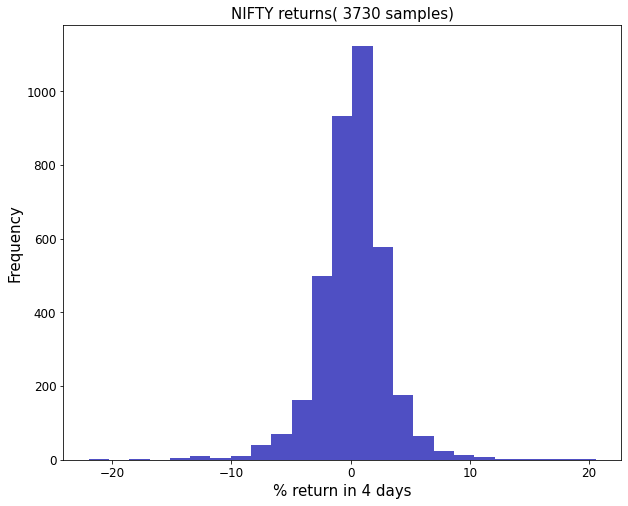

In [17]:
plt.figure(figsize=[10,8])

plt.hist(n_days_returns, bins=25, color='#0504aa',alpha=0.7)

plt.xlabel('% return in {} days'.format(N), fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('NIFTY returns( {} samples)'.format(len(n_days_returns)),fontsize=15)
plt.show()

In [6]:
n_days_returns.describe()

count    3730.000000
mean        0.214235
std         2.930331
min       -21.969767
25%        -1.282409
50%         0.362117
75%         1.749379
max        20.586721
Name: Close, dtype: float64

In [19]:
min_val = np.mean(n_days_returns) - 3*np.std(n_days_returns)
max_val = np.mean(n_days_returns) + 3*np.std(n_days_returns)
normal_n_days_returns = n_days_returns[n_days_returns.between(min_val,max_val)]

In [20]:
from scipy import stats

In [14]:
array = np.random.normal(0.214235, 2.930331, 3730) 

In [15]:
stats.shapiro(array)

ShapiroResult(statistic=0.9992392659187317, pvalue=0.11533945053815842)

In [9]:
stats.shapiro(n_days_returns)

ShapiroResult(statistic=0.9327691793441772, pvalue=4.4058247437612003e-38)

In [21]:
stats.shapiro(normal_n_days_returns)

ShapiroResult(statistic=0.9887662529945374, pvalue=1.7056574080428778e-16)

In [22]:
print(normal_n_days_returns.quantile(.15))
print(normal_n_days_returns.quantile(.85))

-2.1292697148686037
2.5235228008058375
